# CUSTOMER SEGMENTATION

#### Customer segmentation is the process of organizing customers into specific groups based on shared characteristics, behaviors, or preferences, with the aim of delivering more relevant experiences.
* In this project,I am divding the customers into different clusters and analyzing it 



In [1]:
# Importing libraries
import pandas as pd
import numpy as np


## LOADING DATASET

In [2]:
# Loading dataset
data = pd.read_csv('marketing_campaign.csv')


In [3]:
# Reading the first 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# To find the missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* 'Income' has 24 missing values 

In [5]:
# To read the column names
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# to understand no:of rows and columns
data.shape

(2240, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## DATA CLEANING

In [8]:
# removing missing values
# Simply dropping the row having missing values
data = data.dropna()

In [9]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

* 'Dt_Customer' indicate the date customer joined ,it is not parsed as DateTime

In [10]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

In [11]:
# changing the datatype from object to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])


C:\Users\Python\AppData\Local\Temp\ipykernel_11116\4184864100.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\Python\AppData\Local\Temp\ipykernel_11116\4184864100.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\Python\AppData\Local\Temp\ipykernel_11116\4184864100.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
C:\Users\Python\AppData\Local\Temp\ipykernel_11116\4184864100.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['Dt_Custo

In [12]:
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
dates    
    
    

[datetime.date(2012, 4, 9),
 datetime.date(2014, 8, 3),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 10, 2),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 8, 5),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 3, 11),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 6, 1),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 11, 1),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 2, 1),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 11, 5),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 8, 29),
 datetime.d

In [13]:
# to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. 
days = []
for i in dates:
    x = max(dates) - i
    days.append(x)
#days

* Creating a new feature **'Customer_For'**
* Customer_For is the no:of days the customers started to shop in the store relative to the last recorded date


In [14]:
data["Customer_For"] = days
# to change the datatype from timedelta to int
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")
data["Customer_For"]

0       83894400000000000
1       10800000000000000
2       40780800000000000
3        5616000000000000
4       27734400000000000
              ...        
2235    46742400000000000
2236     5270400000000000
2237    27216000000000000
2238    27302400000000000
2239    67564800000000000
Name: Customer_For, Length: 2216, dtype: int64

* Creating a new feature **'Age'**

In [15]:
# Age of customer today
# extracting age from Year_Birth
data['Age'] = 2022-data['Year_Birth']
data['Age']



0       65
1       68
2       57
3       38
4       41
        ..
2235    55
2236    76
2237    41
2238    66
2239    68
Name: Age, Length: 2216, dtype: int64

* Creating a new feature **'Children'**

In [16]:
# Feature indicating total no:of children in a family
data['Children']=data['Kidhome']+data['Teenhome']


* Creating a new feature **'Spent'**

In [17]:
# Feature indicating total spend on various items
data['Spent']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

In [18]:
# exploring the unique values in the categorical features to get a clear idea of the data.
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [19]:
# Replacing 'Marital_Status' into partner and alone
data['Living'] = data['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Single':'Alone','Divorced':'Alone','Widow':'Alone','Absurd':'Alone','YOLO':'Alone'})


* Creating a new feature **'Family_size'**

In [20]:
# Feature indicating total no:of people in a home
data['Family_size'] = data['Living'].replace({'Partner':2,'Alone':1})+data['Children']


In [21]:
# exploring the unique values in the categorical features to get a clear idea of the data.
data['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [22]:
# Replacing 'Education' into 3 groups Undergraduate,Graduate,Postgraduate
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate', 'Graduation':'Graduate', 'Master':'Postgraduate','PhD':'Postgraduate'})


In [23]:
# Renaming some of the columns
data = data.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold'})

* Creating a new feature **'Parent'**

In [24]:
# 1-parent and 0-not a parent
data['Parent']=np.where(data.Children>0,1,0)
data['Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Parent, Length: 2216, dtype: int32

In [25]:
# dropping some of the features
X = ['Dt_Customer','Year_Birth','Marital_Status','Z_CostContact', 'Z_Revenue']
data = data.drop(X,axis=1)

In [26]:
data.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Children,Spent,Living,Family_size,Parent
0,5524,Graduate,58138.0,0,0,58,635,88,546,172,...,0,0,1,83894400000000000,65,0,1617,Alone,1,0
1,2174,Graduate,46344.0,1,1,38,11,1,6,2,...,0,0,0,10800000000000000,68,2,27,Alone,3,1
2,4141,Graduate,71613.0,0,0,26,426,49,127,111,...,0,0,0,40780800000000000,57,0,776,Partner,2,0
3,6182,Graduate,26646.0,1,0,26,11,4,20,10,...,0,0,0,5616000000000000,38,1,53,Partner,3,1
4,5324,Postgraduate,58293.0,1,0,94,173,43,118,46,...,0,0,0,27734400000000000,41,1,422,Partner,3,1


In [27]:
data.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Children', 'Spent', 'Living', 'Family_size', 'Parent'],
      dtype='object')

In [28]:
# to plot some selected features
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

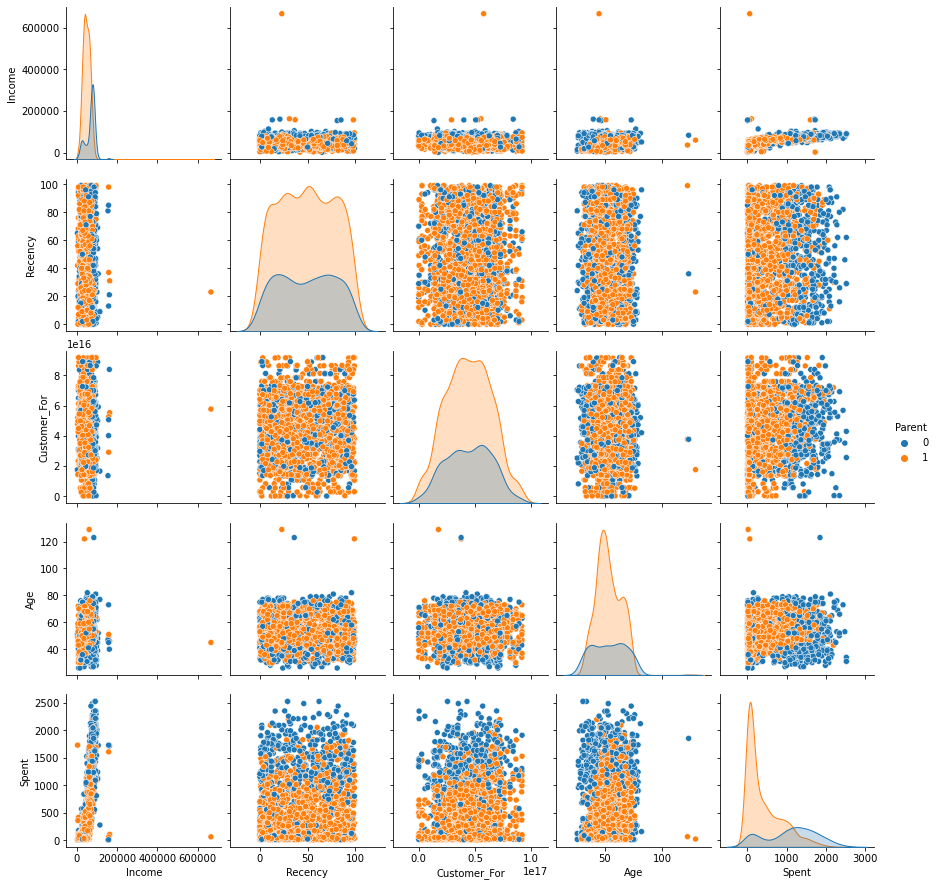

In [29]:
plot_1 =['Income','Recency','Customer_For','Age','Spent','Parent']
sns.pairplot(data[plot_1],hue='Parent')

* There are outliers in **'Income'** and **'Age'**

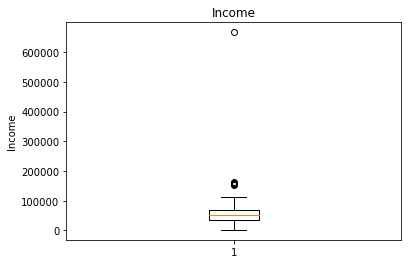

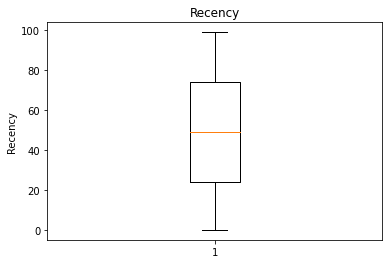

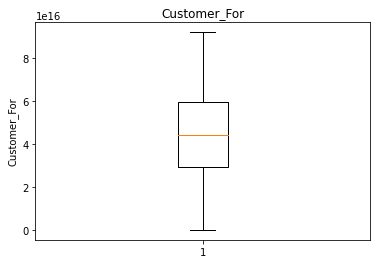

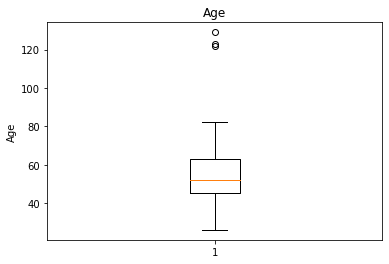

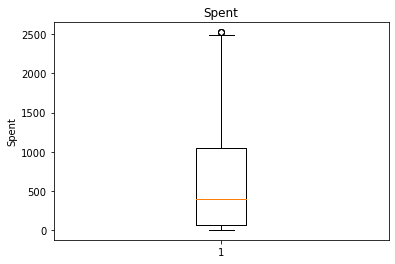

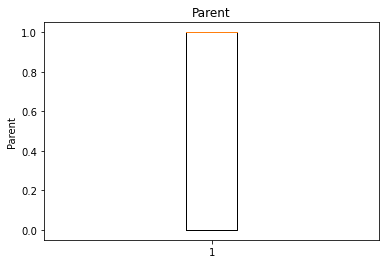

In [30]:
# Another method
# to check the outlayers
plot_1 =['Income','Recency','Customer_For','Age','Spent','Parent']
for i in plot_1:
    plt.boxplot(data[i])
    # gca() is used to get the current axes.
    plt.gca().set(title=i, ylabel=i)
    plt.show()

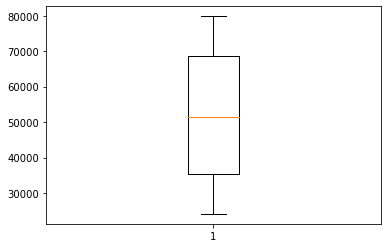

In [31]:
# to delete the outliers
#outlayers treatment
percentiles = data['Income'].quantile([0.1,0.9]).values
data['Income']=data['Income'].clip(percentiles[0],percentiles[1])
# After removing outliers
plt.boxplot(data['Income'])
plt.show()

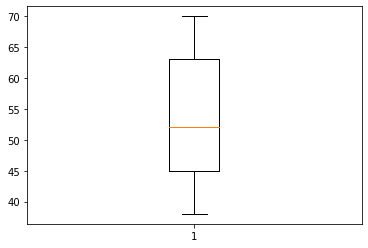

In [32]:
percentiles = data['Age'].quantile([0.1,0.9]).values
data['Age']=data['Age'].clip(percentiles[0],percentiles[1])
# After removing outliers
plt.boxplot(data['Age'])
plt.show()

<AxesSubplot:>

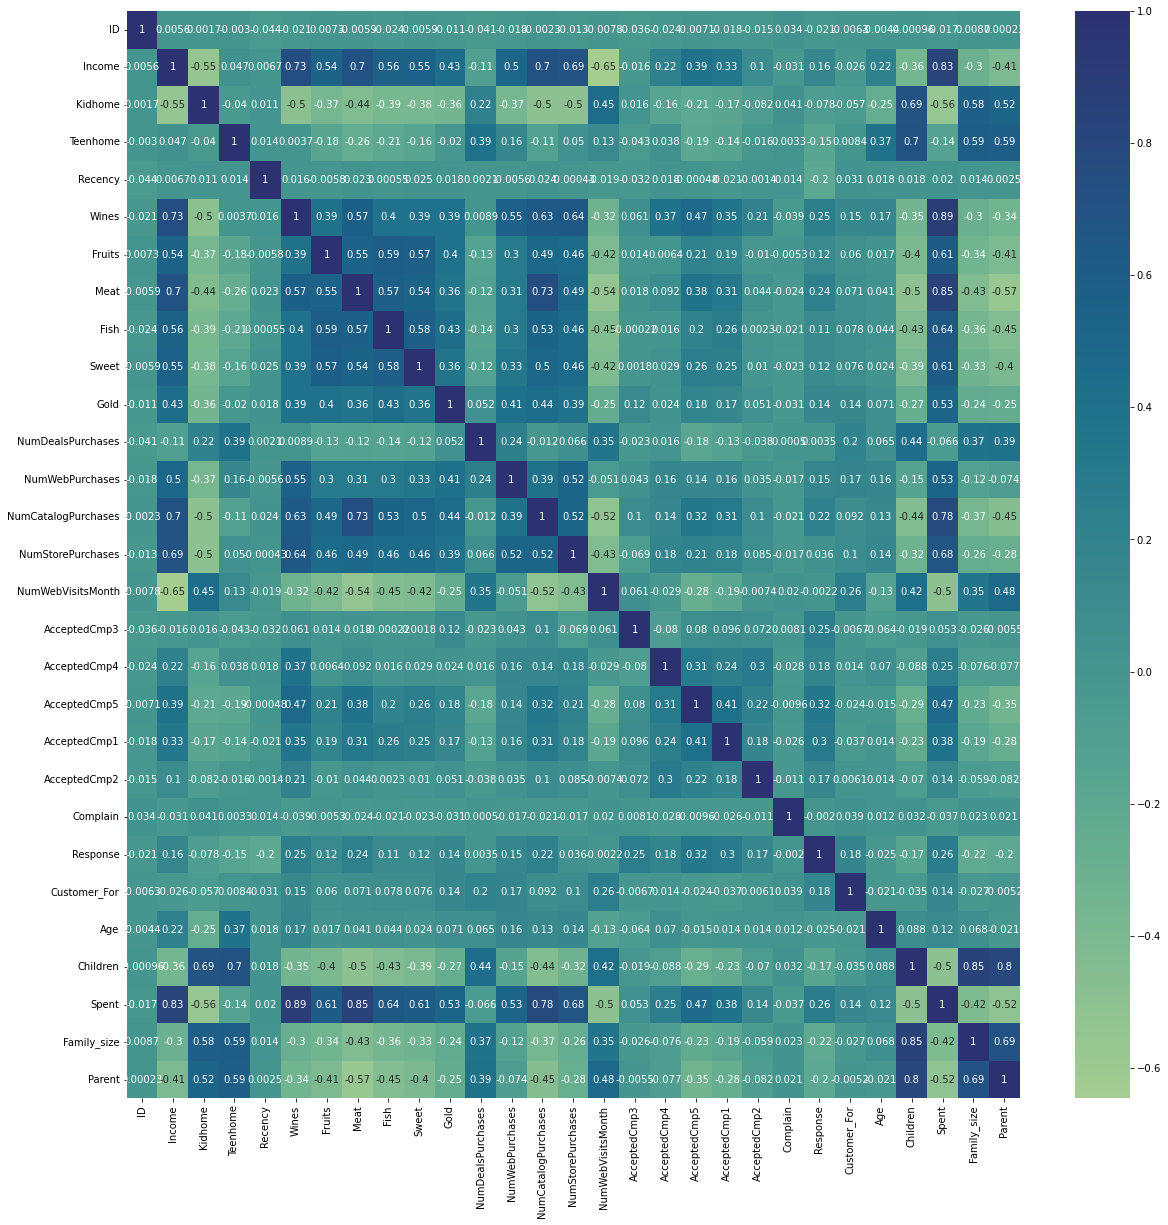

In [33]:
# To find correlation among the features
correlation = data.corr()
plt.figure(figsize=(20,20))
# heatmap = plot rectangular data as a color-encoded matrix.
sns.heatmap(correlation,annot=True,cmap="crest")

## DATA PREPROCESSING

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   Wines                2216 non-null   int64  
 7   Fruits               2216 non-null   int64  
 8   Meat                 2216 non-null   int64  
 9   Fish                 2216 non-null   int64  
 10  Sweet                2216 non-null   int64  
 11  Gold                 2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

* Label Encoding the categorical variables

In [35]:
# getting categorical variables
x =(data.dtypes == 'object')
obj_col = list(x[x].index)
obj_col


['Education', 'Living']

In [36]:
# Changing the categorical variable into numeric
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for i in obj_col:
    data[i] = label.fit_transform(data[i])


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   int32  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   Wines                2216 non-null   int64  
 7   Fruits               2216 non-null   int64  
 8   Meat                 2216 non-null   int64  
 9   Fish                 2216 non-null   int64  
 10  Sweet                2216 non-null   int64  
 11  Gold                 2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [38]:
# creating a copy of the data
data_c = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
col_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
data_c = data_c.drop(col_del,axis =1)


* Scaling the features using StandardScalar

In [39]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
a = scaler.fit_transform(data_c)
scaled_data = pd.DataFrame(a,columns=data_c.columns)
#scaled_data

In [40]:
#Scaled data to be used for reducing the dimensionality
scaled_data.head()

,ID,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Children,Spent,Living,Family_size,Parent
0,-0.019809,-0.894187,0.338376,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,...,2.504712,-0.554143,0.693232,1.974875,1.118253,-1.264803,1.675488,-1.348829,-1.758673,-1.581389
1,-1.051009,-0.894187,-0.292008,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,...,-0.571082,-1.169518,-0.131574,-1.665141,1.403414,1.405806,-0.962358,-1.348829,0.450009,0.632356
2,-0.445526,-0.894187,1.058608,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,...,-0.229327,1.291982,-0.543978,-0.172132,0.357824,-1.264803,0.280250,0.741384,-0.654332,-1.581389
3,0.182737,-0.894187,-1.344856,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,...,-0.912837,-0.554143,0.280829,-1.923298,-1.448196,0.070501,-0.919224,0.741384,0.450009,0.632356
4,-0.081373,0.569268,0.346661,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,...,0.112428,0.061232,-0.131574,-0.821827,-1.163035,0.070501,-0.307044,0.741384,0.450009,0.632356


## DIMENSIONALITY REDUCTION

* Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.
* **Principal component analysis (PCA)** is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss.



In [41]:
# Reducing the dimension to 3
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
a = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(a,columns=['col_1','col_2','col_3'])
pca_data.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2216.0,-1.146295e-16,2.888795,-5.748457,-2.573940,-0.771275,2.433246,7.369693
col_2,2216.0,4.098206e-17,1.710636,-4.310256,-1.344068,-0.180916,1.236895,6.187868
col_3,2216.0,1.575655e-17,1.218955,-3.560142,-0.844432,-0.022346,0.821789,6.208534


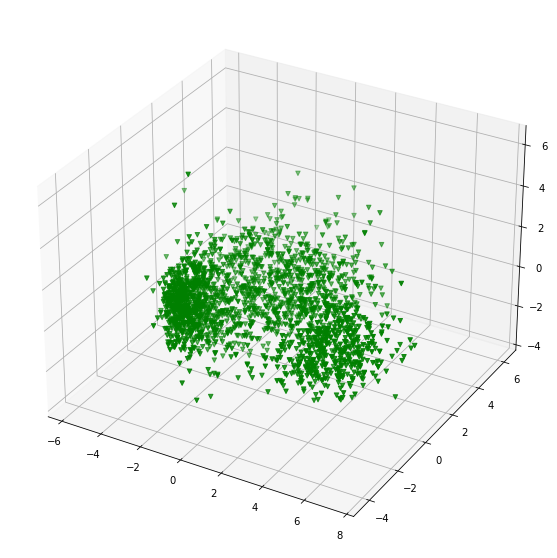

In [42]:
# A 3D projection of the reduced data
x = pca_data['col_1']
y = pca_data['col_2']
z = pca_data['col_3']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection ="3d")
ax.scatter(x,y,z,c="green", marker="v" )

## CLUSTERING

In [43]:
from sklearn.cluster import KMeans


In [44]:
#  Distortion is calculated as the average of the squared distances from the cluster centers of the respective clusters.
#  Inertia is the sum of squared distances of samples to their closest cluster center.
distortions = []
K = range(1,10)
for k in K:
    kmean = KMeans(n_clusters=k)
    kmean.fit(pca_data)
    distortions.append(kmean.inertia_)

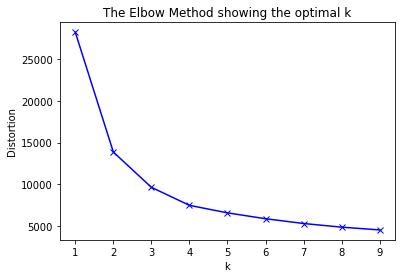

In [45]:
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* We can observe that the elbow is number 4
* 4 will be the optimal number of clusters in this data

In [46]:
from sklearn.cluster import AgglomerativeClustering

* Agglomerative clustering is a hierarchical clustering method. 
* It involves merging examples until the desired number of clusters is achieved.

In [47]:
# Fitting agglomerative clustering method to get the final clusters
AC = AgglomerativeClustering(n_clusters=4)
# Fitting model and predict clusters
a = AC.fit_predict(pca_data)
pca_data['Clusters']= a
# Adding a new feature
data['Clusters'] = a

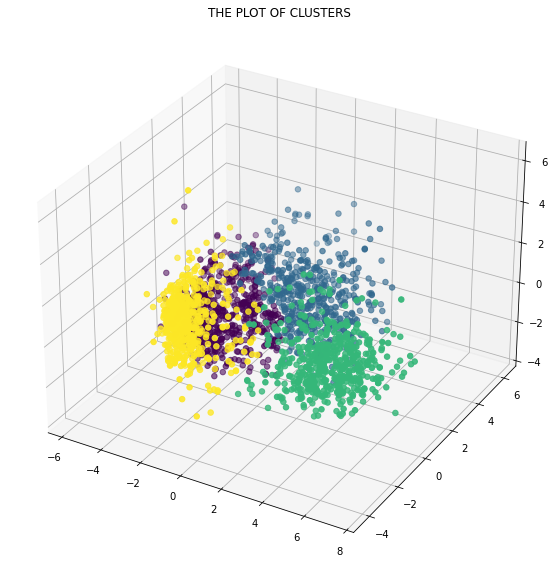

In [48]:
# plotting the clusters
fig = plt.figure(figsize=(10,10))
a = plt.subplot(111,projection='3d')
a.set_title('THE PLOT OF CLUSTERS')
a.scatter(x,y,z,s=30,c=pca_data['Clusters'],marker='o')
plt.show()

## EVALUATING MODELS

C:\Users\Python\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


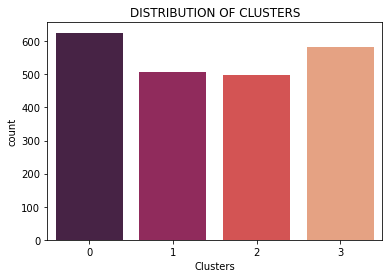

In [49]:
# plotting countplot of clusters
plot = sns.countplot(data['Clusters'],palette='rocket')
plot.set_title('DISTRIBUTION OF CLUSTERS')
plt.show()

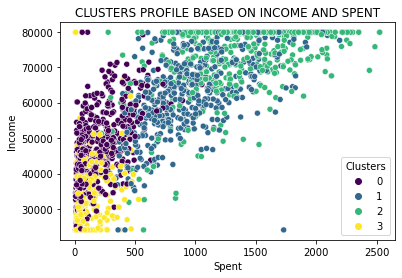

In [50]:
plot = sns.scatterplot(data=data,x=data['Spent'],y=data['Income'],hue=data['Clusters'],palette='viridis')
plot.set_title('CLUSTERS PROFILE BASED ON INCOME AND SPENT')

plt.show()               

* Group 0 = average income and low spent
* Group 1 = high income and average spent
* Group 2 = high income and high spent
* Group 3 = low income and low spent

C:\Users\Python\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Python\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Python\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Python\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 83.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


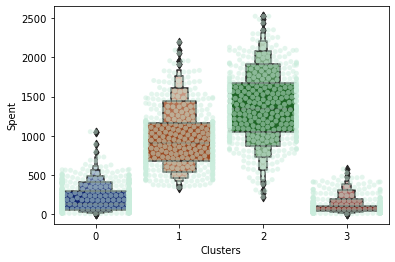

In [51]:
plot =sns.swarmplot(x=data['Clusters'],y=data['Spent'],color='#CBEDDD',alpha=0.5)
plot = sns.boxenplot(x=data['Clusters'],y=data['Spent'],palette='dark')
plt.show()

* From the above plot it is clear that cluster 2 is the biggest set of customers

In [52]:
data.columns

Index(['ID', 'Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_For',
       'Age', 'Children', 'Spent', 'Living', 'Family_size', 'Parent',
       'Clusters'],
      dtype='object')

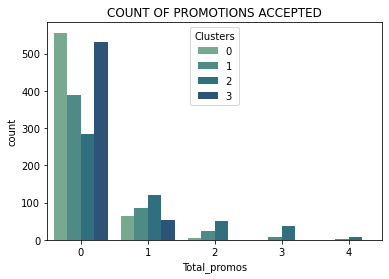

In [53]:
# Creating a new feature to get the sum of accepted promotions
data['Total_promos'] =data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']
#data['Total_promos']
plot=sns.countplot(x=data['Total_promos'],hue=data['Clusters'],palette='crest')
plot.set_title('COUNT OF PROMOTIONS ACCEPTED')
plt.show()

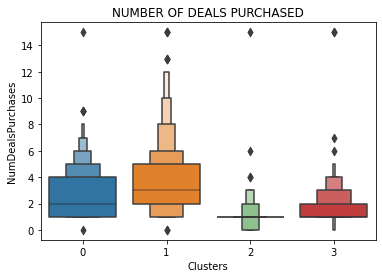

In [54]:
# Plotting the number of deals purchased
plot=sns.boxenplot(x=data['Clusters'],y=data['NumDealsPurchases'])
plot.set_title('NUMBER OF DEALS PURCHASED')
plt.show()

## PROFILING

<Figure size 432x288 with 0 Axes>

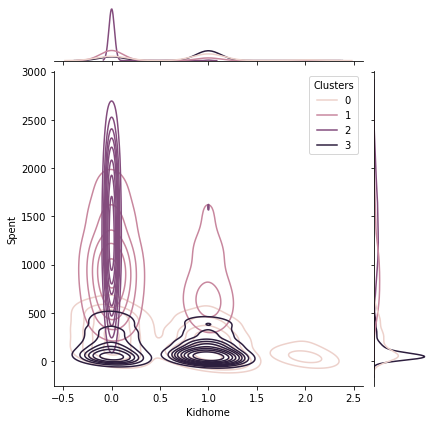

C:\Users\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

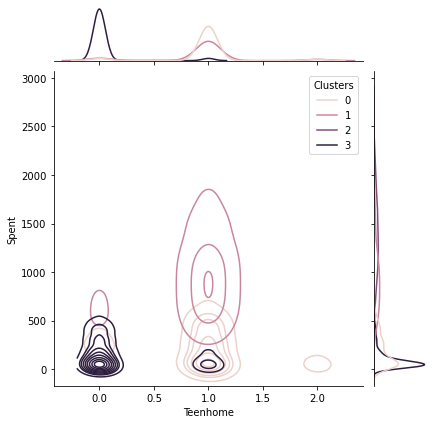

<Figure size 432x288 with 0 Axes>

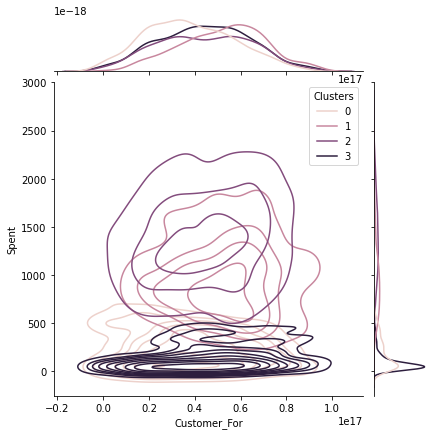

<Figure size 432x288 with 0 Axes>

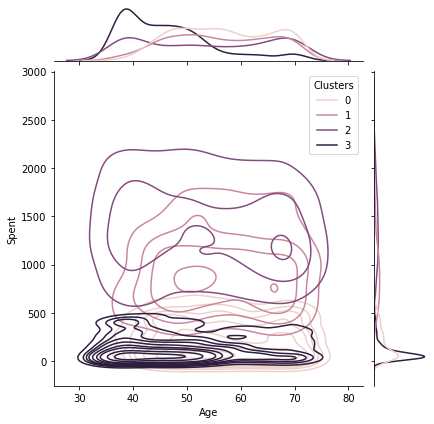

<Figure size 432x288 with 0 Axes>

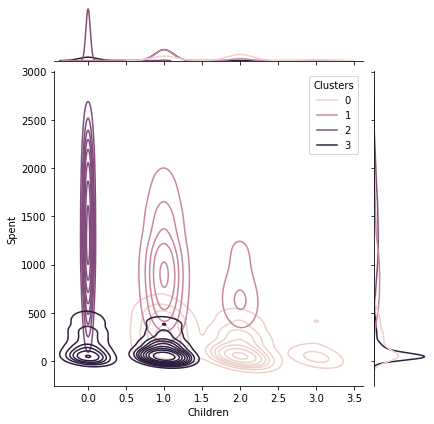

<Figure size 432x288 with 0 Axes>

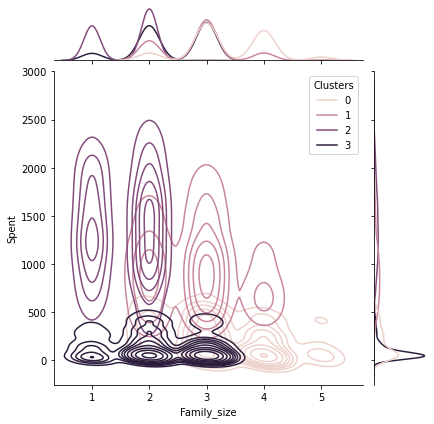

C:\Users\Python\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

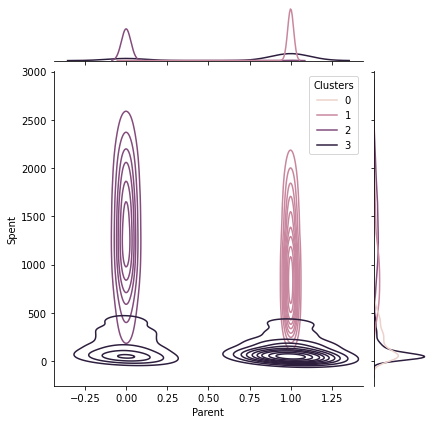

<Figure size 432x288 with 0 Axes>

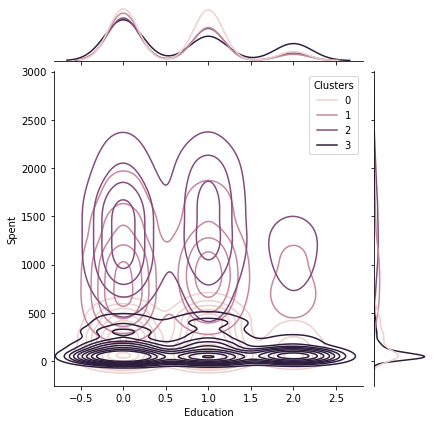

<Figure size 432x288 with 0 Axes>

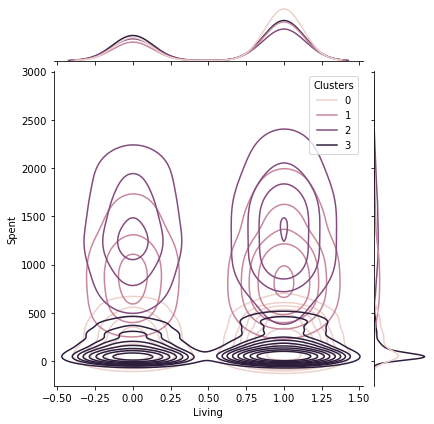

<Figure size 432x288 with 0 Axes>

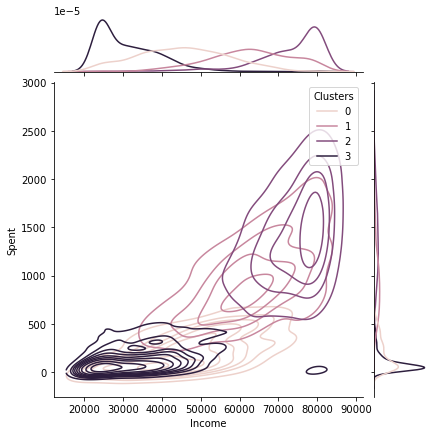

In [56]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_size", "Parent", "Education","Living","Income"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"],kind='kde',hue =data["Clusters"])
    plt.show()